## Course Project

**Instructions:** <br>
a. In the course project, you will analyze a real-world dataset on housing sale price prediction. You will write a report on your data analysis using Jupyter Notebook. <br>
b. For each step, make sure to explain what you are doing, annotate your results, and provide your interpretation. <br>
c. When you finish, make sure to use `Kernel` -> `Restart and Run All` to restart the kernel and rerun the entire notebook to generate the desired outputs, before submitting your project report. <br>
d. Upload your .ipynb file to Canvas for grading. <br>
e. All questions related to the course project shall be posted in the Discussions section on Canvas. <br>
<br>

**Policy:** <br>
The course project is worth 25 points, counting towards 25% of the course final score. <br>

Late submission, empty submission or no submission receives 0 point. Please note that in order to pass the course, at least 30% of the total score for the project must be obtained. In case of special circumstances, email the instructor directly ahead of time. 

### Housing Sale Price Prediction
You can download the csv files from the project folder on Canvas.  <br>

#### Context
There can be tons of reasons that affect the price of a house. This project aims to predict the final price of each home `SalePrice`. <br>

#### Variables: Brief Description
SalePrice - the property's sale price in dollars: the target variable to predict.<br>
MSSubClass: The building class<br>
MSZoning: The general zoning classification<br>
LotFrontage: Linear feet of street connected to property<br>
LotArea: Lot size in square feet<br>
Street: Type of road access<br>
Alley: Type of alley access<br>
LotShape: General shape of property<br>
LandContour: Flatness of the property<br>
Utilities: Type of utilities available<br>
LotConfig: Lot configuration<br>
LandSlope: Slope of property<br>
Neighborhood: Physical locations within Ames city limits<br>
Condition1: Proximity to main road or railroad<br>
Condition2: Proximity to main road or railroad (if a second is present)<br>
BldgType: Type of dwelling<br>
HouseStyle: Style of dwelling<br>
OverallQual: Overall material and finish quality<br>
OverallCond: Overall condition rating<br>
YearBuilt: Original construction date<br>
YearRemodAdd: Remodel date<br>
RoofStyle: Type of roof<br>
RoofMatl: Roof material<br>
Exterior1st: Exterior covering on house<br>
Exterior2nd: Exterior covering on house (if more than one material)<br>
MasVnrType: Masonry veneer type<br>
MasVnrArea: Masonry veneer area in square feet<br>
ExterQual: Exterior material quality<br>
ExterCond: Present condition of the material on the exterior<br>
Foundation: Type of foundation<br>
BsmtQual: Height of the basement<br>
BsmtCond: General condition of the basement<br>
BsmtExposure: Walkout or garden level basement walls<br>
BsmtFinType1: Quality of basement finished area<br>
BsmtFinSF1: Type 1 finished square feet<br>
BsmtFinType2: Quality of second finished area (if present)<br>
BsmtFinSF2: Type 2 finished square feet<br>
BsmtUnfSF: Unfinished square feet of basement area<br>
TotalBsmtSF: Total square feet of basement area<br>
Heating: Type of heating<br>
HeatingQC: Heating quality and condition<br>
CentralAir: Central air conditioning<br>
Electrical: Electrical system<br>
1stFlrSF: First Floor square feet<br>
2ndFlrSF: Second floor square feet<br>
LowQualFinSF: Low quality finished square feet (all floors)<br>
GrLivArea: Above grade (ground) living area square feet<br>
BsmtFullBath: Basement full bathrooms<br>
BsmtHalfBath: Basement half bathrooms<br>
FullBath: Full bathrooms above grade<br>
HalfBath: Half baths above grade<br>
Bedroom: Number of bedrooms above basement level<br>
Kitchen: Number of kitchens<br>
KitchenQual: Kitchen quality<br>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br>
Functional: Home functionality rating<br>
Fireplaces: Number of fireplaces<br>
FireplaceQu: Fireplace quality<br>
GarageType: Garage location<br>
GarageYrBlt: Year garage was built<br>
GarageFinish: Interior finish of the garage<br>
GarageCars: Size of garage in car capacity<br>
GarageArea: Size of garage in square feet<br>
GarageQual: Garage quality<br>
GarageCond: Garage condition<br>
PavedDrive: Paved driveway<br>
WoodDeckSF: Wood deck area in square feet<br>
OpenPorchSF: Open porch area in square feet<br>
EnclosedPorch: Enclosed porch area in square feet<br>
3SsnPorch: Three season porch area in square feet<br>
ScreenPorch: Screen porch area in square feet<br>
PoolArea: Pool area in square feet<br>
PoolQC: Pool quality<br>
Fence: Fence quality<br>
MiscFeature: Miscellaneous feature not covered in other categories<br>
MiscVal: Value of miscellaneous feature<br>
MoSold: Month Sold<br>
YrSold: Year Sold<br>
SaleType: Type of sale<br>
SaleCondition: Condition of sale<br>

### Module 1: Data Exploration
Load `housing_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 3,000 observations remain for further analysis. <br>

Hint: for removal of extreme outliers, consider: Q1=df.quantile(0.25); Q3=df.quantile(0.75); IQR=Q3-Q1; <br>
Remove samples that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('housing_train.csv')
df1 = df.copy()

#Removal of outliers
Q1 = np.percentile(df1['SalePrice'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df1['SalePrice'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old shape ", df1.shape) 
# Upper bound
upper = np.where(df1['SalePrice'] >= (Q3+2.5*IQR))
# Lower bound
lower = np.where(df1['SalePrice'] <= (Q1-2.5*IQR))
 
''' Removing the Outliers '''
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)

print("New shape ", df1.shape)

print("50 observations were removed for extreme removal. 1150 remain for further analysis.")

#change some categorical to numerical using dummy indicator
#

Old shape  (1200, 81)
New shape  (1181, 81)
50 observations were removed for extreme removal. 1150 remain for further analysis.


In [3]:
#determine which rows are numerical
#looking for columns with data type 'int64'

c = df1.select_dtypes(include = 'int64')


In [4]:
#checking whether there are any null values
c.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
X1stFlrSF        0
X2ndFlrSF        0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
X3SsnPorch       0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [5]:
#looking for columns with data type 'float64'
d = df1.select_dtypes(include = 'float64')
d

,LotFrontage,MasVnrArea,GarageYrBlt
0,60.0,0.0,1979.0
1,NaN,0.0,1984.0
2,NaN,1.0,1977.0
3,87.0,250.0,2006.0
4,63.0,106.0,2004.0
...,...,...,...
1195,71.0,338.0,2008.0
1196,70.0,116.0,1998.0
1197,NaN,180.0,1957.0
1198,65.0,266.0,2004.0


In [6]:
#checking for null values
d.isnull().sum()

LotFrontage    209
MasVnrArea       5
GarageYrBlt     69
dtype: int64

/Users/farihaahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage'>

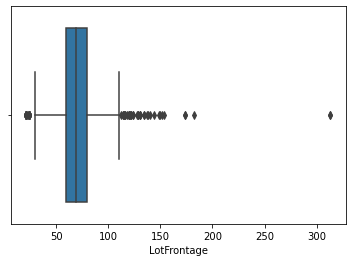

In [7]:
sns.boxplot(d.LotFrontage)


/Users/farihaahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MasVnrArea'>

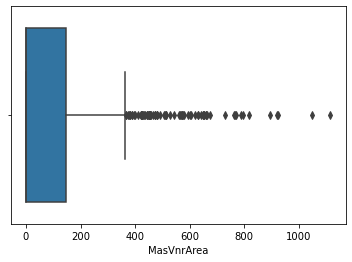

In [8]:
sns.boxplot(d.MasVnrArea)


/Users/farihaahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageYrBlt'>

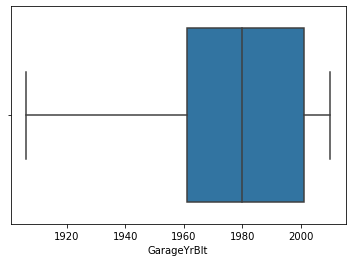

In [9]:
sns.boxplot(d.GarageYrBlt)


In [10]:
#Since the boxplot of the column 'LotFrontage' shows outliers, so we will fill the missing values of it with the median value
df2 = df1.copy()
df2['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [11]:
#Since MasVnrArea shows outliers in the boxplot, so we fill the missing values with the median values
df2['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [12]:
#Since 'GarageYrBlt' contains time series data, we use the 'ffill', i.e., forward fill function to fill the missing values
df2['GarageYrBlt'].fillna(method='ffill', inplace = True)


In [13]:
c1 = df2.select_dtypes(include = 'float64')
c1

,LotFrontage,MasVnrArea,GarageYrBlt
0,60.0,0.0,1979.0
1,70.0,0.0,1984.0
2,70.0,1.0,1977.0
3,87.0,250.0,2006.0
4,63.0,106.0,2004.0
...,...,...,...
1195,71.0,338.0,2008.0
1196,70.0,116.0,1998.0
1197,70.0,180.0,1957.0
1198,65.0,266.0,2004.0


In [14]:
#checking the number of the null values again 
c1.isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the high-price group (i.e. > 300,000) versus the low-price group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important, and you may state in your findings that variables a, b, c have similar patterns.

In [15]:
#splitting the dataframe into high-price and low-price group 
hp = df2[df2['SalePrice'] > 300000]
lp = df2[df2['SalePrice'] <= 300000]

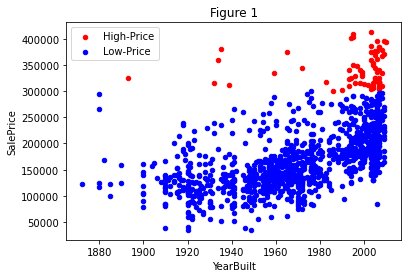

In [16]:
# open figure/axis
fig, ax = plt.subplots()

# plot // you need to specify the axis
hp.plot(x='YearBuilt', y='SalePrice', kind='scatter', ax=ax, c='r', label = 'High-Price')
lp.plot(x='YearBuilt', y='SalePrice', kind='scatter', ax=ax, c='b', label = 'Low-Price')
plt.title('Figure 1')
plt.legend()

In the figure 1, we can see that the ditribution of the high sale price group and the low sale price group are quite different from each other. Most of the high priced houses were built in the more recet period. Almost all the older houses fall in the lower price range. 

Text(0.5, 1.0, 'Figure 2.2')

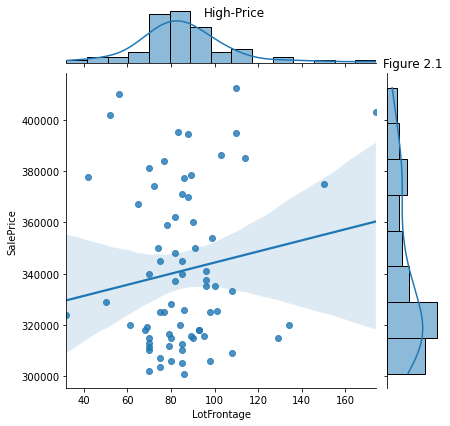

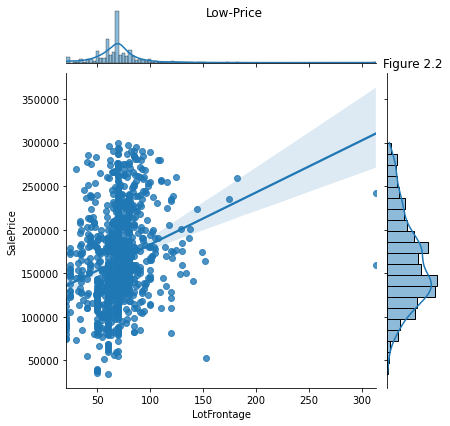

In [17]:
hp1 = sns.jointplot(data = hp, x="LotFrontage", y="SalePrice", kind="reg", label = "High-Price")
hp1.fig.suptitle('High-Price')
plt.title('Figure 2.1')
lp1 = sns.jointplot(data = lp, x="LotFrontage", y="SalePrice", kind="reg", label = "Low-Price")
lp1.fig.suptitle('Low-Price')
plt.title('Figure 2.2')



Figure 2 has two parts, i.e., figure 2.1 and figure 2.2. Figure 2 is used to explore the relationship between LotFrontage, which is the linear feet of street connected to property. Figure 2.1 is for the high priced houses and figure 2.2 is for the low priced housing. The figures exhibit positive relationship between the variables which is eveident from positively slopped regression line plotted from the scatter plots. From the above graph, we an see that the variables of the high-price group are uniformly distributed through the range. However, variables in the low-price group are skewed to the left. This shows that, most properties which have longer streets conneted to them may cost higher. But after crossing a certain price, 300,000 in this case, the variables are more uniformly distributed compared to the low priced housing.

Text(0.5, 1.0, 'Figure 3')

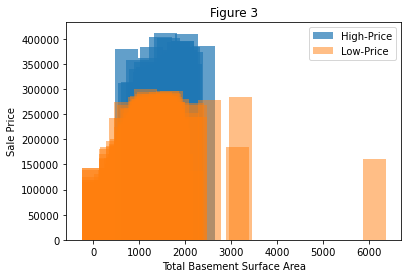

In [18]:
plt.bar(hp['TotalBsmtSF'], hp['SalePrice'],width = 500, label='High-Price', alpha = 0.7)
plt.bar(lp['TotalBsmtSF'], lp['SalePrice'], width = 500, label = 'Low-Price', alpha = 0.5)
plt.legend()
plt.xlabel('Total Basement Surface Area')
plt.ylabel('Sale Price')
plt.title('Figure 3')

In the figure 3, we have tried to explore the relationship between the total basement surface area of the houses with their sale prices. In this case, we have observed that the total basement area of the low-priced houses are more widely distributed compared to the low-priced group.

Text(0.5, 1.0, 'Figure 4.2')

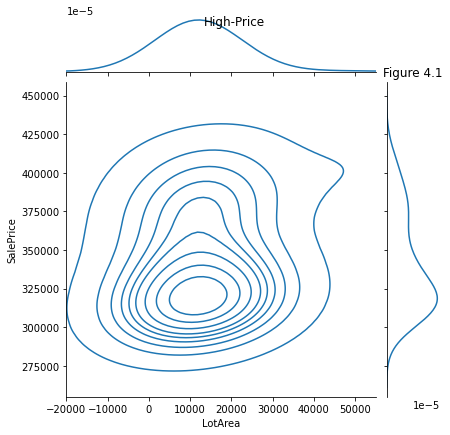

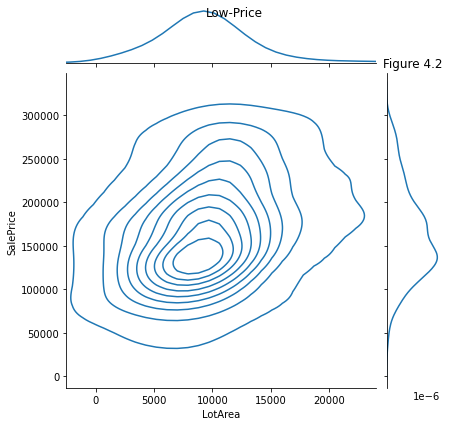

In [19]:
hp2 = sns.jointplot(data=hp, x="LotArea", y="SalePrice", kind="kde", xlim=(-20000,55000))
hp2.fig.suptitle('High-Price')
plt.title('Figure 4.1')


lp2 = sns.jointplot(data=lp, x="LotArea", y="SalePrice", kind="kde", xlim=(-2500,24000))
lp2.fig.suptitle('Low-Price')
lp2.set_xlim=(0,2000)
plt.title('Figure 4.2')

Figure 4 is reagrding how the size of the LotArea, which is the lot size of the property, affects the sale price of the housing. If we take a look at figure 4.1, this is the figure for the high-price group of houses. In this case, we can see that the density of the points are much denser when SalePrice is between 275000 and 320000 and when the LotArea is within 0 and 30000. Thus it can be said that most houses of the high-price range has a lot size within 0 and 30000. Figure 4.4 focuses on the relationship between the LotArea of the low-price range houses with their selling prices. According the figure, we can see that most houses are within the range of LotArea 2000 to 15000 and SalePrice 60000 to 250000.   

/Users/farihaahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/farihaahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Figure 5.2')

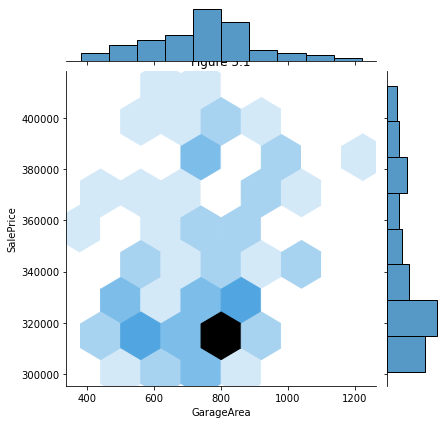

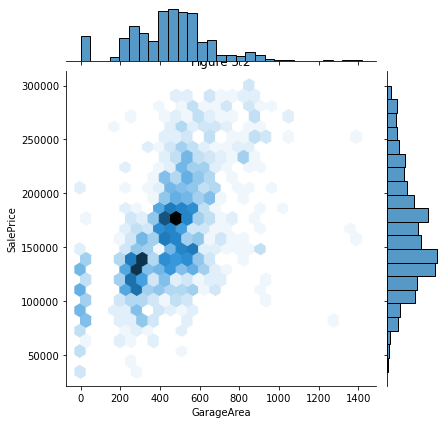

In [20]:
hp3 = sns.jointplot("GarageArea", "SalePrice", data=hp, kind='hex');#hexagon density plot (nonnegative)
hp2.fig.suptitle('High-Price')
plt.title('Figure 5.1')


lp3 = sns.jointplot("GarageArea", "SalePrice", data=lp, kind='hex'); #hexagon density plot (nonnegative)
hp2.fig.suptitle('Low-Price')
plt.title('Figure 5.2')

The Figure 5 is regarding the relationship between the GarageArea of houses and their SalePrice. The first figure, figure 5.1, focuses on the houses that fall into the high-price range. The second figure, figure 5.2, is regarding the houses that fall into the lower selling price category. Both the figures show a positive relationship between 'GarageArea' the 'SalePrice' of the houses. In figure 5.1, we can see that the hexagon is the darkest in color when the value of GarageArea is around 800 and SalePrice is between 300000 and 320000. In the second figure, figure 5.2, we can see that, there are more than darker hexagons, suggesting more variation in the SalePrice and GarageArea of the numebr of categories that contain the most number of houses.

### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

In [21]:
#PCA

In order to perform dimension reduction, we will use Principal Component Analysis (PCA).
PCA works better on numerical data, so we will be splitting the dataframe into categorical and numerical.
Finally, we will perform PCA on numerical data only and will be taking the modified dataset for further analysis in module 4.

In [22]:
df3 = df2.select_dtypes(include = 'number')
df3.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,952,20,60.0,7800,5,5,1965,1965,0.0,641,...,421,0,0,0,0,0,0,7,2006,119900
1,161,20,70.0,11120,6,6,1984,1984,0.0,660,...,0,0,0,0,0,0,0,6,2008,162500
2,1231,90,70.0,18890,5,5,1977,1977,1.0,498,...,155,24,145,0,0,0,8300,8,2007,190000
3,553,20,87.0,11146,8,5,2006,2006,250.0,0,...,169,39,0,0,0,0,0,7,2009,255500
4,1445,20,63.0,8500,7,5,2004,2004,106.0,0,...,192,60,0,0,0,0,0,11,2007,179600


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition

In [24]:
X = df3.drop('SalePrice',axis=1)#Feature Matrix
X = StandardScaler().fit_transform(X) #normalizing the feature
y = df3.loc[:,"SalePrice"]          #Target Variable
df3

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,952,20,60.0,7800,5,5,1965,1965,0.0,641,...,421,0,0,0,0,0,0,7,2006,119900
1,161,20,70.0,11120,6,6,1984,1984,0.0,660,...,0,0,0,0,0,0,0,6,2008,162500
2,1231,90,70.0,18890,5,5,1977,1977,1.0,498,...,155,24,145,0,0,0,8300,8,2007,190000
3,553,20,87.0,11146,8,5,2006,2006,250.0,0,...,169,39,0,0,0,0,0,7,2009,255500
4,1445,20,63.0,8500,7,5,2004,2004,106.0,0,...,192,60,0,0,0,0,0,11,2007,179600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1028,20,71.0,9520,8,5,2007,2008,338.0,1513,...,192,44,0,0,0,0,0,4,2008,293077
1196,872,60,70.0,8750,6,5,1998,1998,116.0,505,...,0,77,0,0,0,0,0,6,2010,200500
1197,561,20,70.0,11341,5,6,1957,1996,180.0,1302,...,0,0,0,0,95,0,0,5,2010,121500
1198,217,20,65.0,8450,7,5,2004,2004,266.0,946,...,139,98,0,0,0,0,0,4,2008,210000


In [25]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
normalised_housing = pd.DataFrame(X, columns = feat_cols)
normalised_housing

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36
0,0.527557,-0.863508,-0.452876,-0.257085,-0.795064,-0.520420,-0.195627,-0.939616,-0.573943,0.480147,...,-0.797319,2.737053,-0.701149,-0.358163,-0.117115,-0.267733,-0.064401,-0.107772,0.257281,-1.364308
1,-1.352722,-0.863508,-0.004968,0.070516,-0.038440,0.387432,0.439086,-0.021441,-0.573943,0.522837,...,0.216745,-0.743377,-0.701149,-0.358163,-0.117115,-0.267733,-0.064401,-0.107772,-0.112815,0.147891
2,1.190766,0.783613,-0.004968,0.837220,-0.795064,-0.520420,0.205244,-0.359716,-0.567751,0.158845,...,0.611103,0.538016,-0.330350,1.955702,-0.117115,-0.267733,-0.064401,27.250627,0.627377,-0.608209
3,-0.420902,-0.863508,0.756474,0.073081,1.474809,-0.520420,1.174016,1.041708,0.974130,-0.960096,...,2.057083,0.653755,-0.098600,-0.358163,-0.117115,-0.267733,-0.064401,-0.107772,0.257281,0.903990
4,1.699463,-0.863508,-0.318503,-0.188012,0.718185,-0.520420,1.107204,0.945058,0.082440,-0.960096,...,0.733166,0.843897,0.225850,-0.358163,-0.117115,-0.267733,-0.064401,-0.107772,1.737665,-0.608209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0.708216,-0.863508,0.039822,-0.087364,1.474809,-0.520420,1.207422,1.138358,1.519051,2.439415,...,1.550051,0.843897,-0.021350,-0.358163,-0.117115,-0.267733,-0.064401,-0.107772,-0.853007,0.147891
1177,0.337390,0.077704,-0.004968,-0.163344,-0.038440,-0.520420,0.906769,0.655109,0.144363,0.174573,...,0.249608,-0.743377,0.488499,-0.358163,-0.117115,-0.267733,-0.064401,-0.107772,-0.112815,1.660090
1178,-0.401885,-0.863508,-0.004968,0.092323,-0.795064,0.387432,-0.462874,0.558459,0.540669,1.965326,...,0.273082,-0.743377,-0.701149,-0.358163,-0.117115,1.559635,-0.064401,-0.107772,-0.482911,1.660090
1179,-1.219605,-0.863508,-0.228922,-0.192946,0.718185,-0.520420,1.107204,0.945058,1.073206,1.165441,...,0.066513,0.405744,0.812949,-0.358163,-0.117115,-0.267733,-0.064401,-0.107772,-0.853007,0.147891


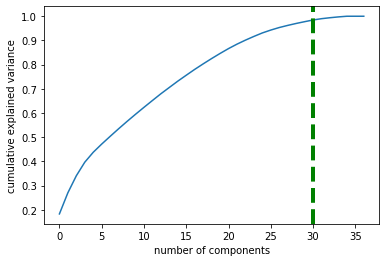

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.182993,1.829928e-01
1,0.270324,8.733096e-02
2,0.340720,7.039585e-02
3,0.396761,5.604134e-02
4,0.437777,4.101616e-02
5,0.471603,3.382549e-02
6,0.503539,3.193682e-02
7,0.534887,3.134789e-02
8,0.565298,3.041080e-02
9,0.594753,2.945441e-02


In [26]:
pca = PCA().fit(normalised_housing)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='g',linestyle= "--", x = 30, ymin = 0, ymax=1)
display(plt.show())

evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df)

If we take 30 components, we can still explain over 98% of the variance. The rest of the components explain less than 2% of the variance. So we will cut them.

In [27]:
pca = PCA(n_components = 30)
pca.fit(normalised_housing)
normal_pca = pca.transform(normalised_housing)

In [28]:
print("Shape of the old dataframe ", normalised_housing.shape)
print("Shape of the reduced dataframe ", normal_pca.shape)

Shape of the old dataframe  (1181, 37)
Shape of the reduced dataframe  (1181, 30)


### Module 4: Regression and Prediction
Choose three regression methods and build regression models based on data from `housing_train.csv`, using 5-fold cross-validation. <br>

Further, load `housing_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the mean squared error. Which houses have the worst prediction and what are their characteristics? <br>

Note: we don't deduct points based on accuracy, as long as the models can be fitted correctly and the results are reasonable. However, if the model is wrong and does not yield meaningful and interpretable results, or if the results are interpreted incorrectly and wrong conclusions are drawn, points will be deducted.  

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In order to build the regression models, we need to train our models using the housing_training.csv dataset. For that, we are first going to split our training dataset into test and train and perform cross validation.  

In [30]:
X1 = df3.drop('SalePrice',axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y, test_size = 0.2, random_state = 0)
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(944, 37)
(944,)
(237, 37)
(237,)


The first regression model will be using the 'Simple Linear Regression' method. We are going to train the model first using our training dataset.

In [31]:
from sklearn import datasets, linear_model, metrics
reg_model = LinearRegression()
reg_model.fit(Xtrain, ytrain)
print(cross_val_score(reg_model, X, y))


[0.71664699 0.63978543 0.83713858 0.75594501 0.84248407]


In [32]:
cf = pd.read_csv('housing_test.csv')
cf1 = cf.copy()
e = cf1.select_dtypes(include = 'number')
e1 = e.copy()
#e1['LotFrontage'] = e1['LotFrontage'].replace(np.nan, 0)
#e1['MasVnrArea'] = e1['MasVnrArea'].replace(np.nan, 0)
#e1['GarageYrBlt'] = e1['GarageYrBlt'].replace(np.nan, 0)
e1['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
e1['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
e1['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
e1.isnull().sum()
e1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,664,85,60.0,10012,4,5,1972,1972,0.0,920,...,0,0,180,0,0,0,0,4,2008,137500
1,347,20,70.0,12772,6,8,1960,1998,0.0,498,...,0,0,0,0,0,0,15500,4,2007,151500
2,1333,20,70.0,8877,4,6,1938,1958,1.0,690,...,0,0,0,0,0,0,0,5,2009,100000
3,1432,120,87.0,4928,6,6,1976,1976,250.0,958,...,0,60,0,0,0,0,0,10,2009,143750
4,439,30,63.0,4280,5,6,1913,2002,106.0,365,...,0,0,34,0,0,0,0,3,2007,90350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1079,120,104.0,4435,6,5,2004,2004,160.0,662,...,140,0,0,0,0,0,0,5,2006,155900
256,1331,20,80.0,10000,8,5,2006,2006,288.0,0,...,144,45,0,0,0,0,0,12,2007,227000
257,1302,70,70.0,7500,6,7,1942,1950,0.0,547,...,0,0,0,0,224,0,0,11,2009,177500
258,580,50,70.0,12150,5,5,1954,1954,122.0,0,...,0,0,0,0,0,0,0,11,2008,131500


In [33]:
e1.shape

(260, 38)

In [34]:
X1test = e1.drop(columns='SalePrice')
y1test = e1.loc[:,'SalePrice']
print(X1test.shape)
print(y1test.shape)

(260, 37)
(260,)


Now, we will apply the model for performing prediction on our test dataset.

In [35]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score


In [36]:
prediction = reg_model.predict(X1test)
accuracy = reg_model.score(X1test, y1test)
print(accuracy)

0.8049191811983052


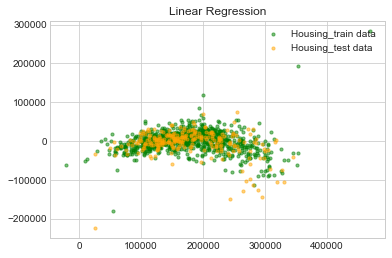

In [37]:
plt.style.use('seaborn-whitegrid')
  
# plotting error vs the predicted data for training data
h = plt.scatter(reg_model.predict(Xtrain), reg_model.predict(Xtrain) - ytrain,
            color = "green", s = 10, alpha = 0.5, label = 'Housing_train data')
  
# plotting for error vs the predicted data for test data
p = plt.scatter(reg_model.predict(X1test), reg_model.predict(X1test) - y1test,
            color = "orange", s = 10, alpha = 0.5, label = 'Housing_test data')
  
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
plt.legend(loc = 'upper right')
plt.title("Linear Regression")
plt.show()

For the next regression model we will be using is the Lasso regression method.

In [38]:
from sklearn.linear_model import Lasso

In [39]:
lassoReg = Lasso(alpha=1.0)
lassoReg.fit(Xtrain, ytrain)
print(cross_val_score(lassoReg, X1, y))

[0.7164641  0.63979086 0.83716348 0.75598371 0.84292745]


In [40]:
prediction = lassoReg.predict(X1test)
accuracy = lassoReg.score(X1test, y1test)
print(accuracy)

0.8049053226695492


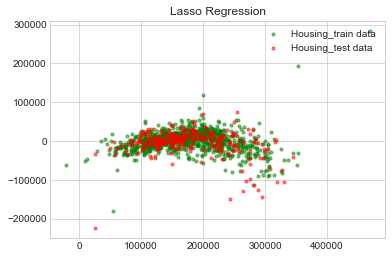

In [41]:
plt.style.use('seaborn-whitegrid')
  
# plotting for error vs predicted data in training data
a = plt.scatter(lassoReg.predict(Xtrain), lassoReg.predict(Xtrain) - ytrain, color = "green", s = 10, alpha = 0.5, label = 'Housing_train data')
  
# plotting error vs predicted data in test data
b = plt.scatter(lassoReg.predict(X1test), lassoReg.predict(X1test) - y1test, color = "red", s = 10, alpha = 0.5, label = 'Housing_test data')
  
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Lasso Regression")
plt.show()

Our 3rd regression model is going to follow the ridge regression method.

In [42]:
#Regularized Ridge
from sklearn.linear_model import Ridge

In [43]:
Regridge = Ridge(alpha = 0.3)
Regridge.fit(Xtrain, ytrain)
print(cross_val_score(Regridge, X1, y))

[0.71640393 0.63975863 0.83719988 0.75601579 0.84294718]


In [44]:
prediction = Regridge.predict(X1test)
accuracy = Regridge.score(X1test, y1test)
print(accuracy)

0.8048889163308874


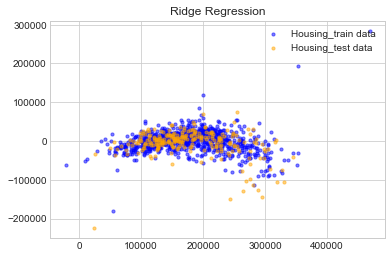

In [45]:
plt.style.use('seaborn-whitegrid')
  
# plotting for error vs the predicted data for training data
p = plt.scatter(Regridge.predict(Xtrain), Regridge.predict(Xtrain) - ytrain, color = "blue", s = 10, alpha = 0.5, label = 'Housing_train data')
  
# plotting error vs predicted data for test data
q = plt.scatter(Regridge.predict(X1test), Regridge.predict(X1test) - y1test, color = "orange", s = 10, alpha = 0.5, label = 'Housing_test data')
  
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Ridge Regression")
plt.show()

In order to answer the question regrading which of the houses has the worst predictions, we have tried to plot a scatter plot of the residual error after performing the predictions with each of the models. Every scatter plot shows very similar scenerio. Majority of the points gather around the x-axis, which indicates that the accuracy of our models are high. However, there are a few points which are away from the x-axis and some of them are quite far away. It can be said that, those houses have the worst predictions. From the graphs it is eveident the the houses with the higher errors are the ones with a very high or low selling prices. Those can also be considered as a outliers which our regression models failed to accomodate.  

### Module 5: Summary
Summarize your findings and draw conclusions.

To summarize the findings, I will briefly go through modules 1, 2, 3, and 4 and explain my actions.

Module 1:
In this module, I explored the housing_train.csv and, in the process, cleaned and prepared it for further analysis. First, I got rid of the extreme outliers since I was going to perform predictions based on this dataset, and outliers can produce significant errors in our forecast. Next, I observed that there are two types of data in the dataset, numerical and categorical. Since I was going to perform Principal Component Analysis in Module 3 for dimension reduction, I decided to split the columns containing categorical data from the dataframe as they could get me into trouble while performing PCA. Next, I checked the dataset for NA values in the remaining columns containing the numerical data. Three columns, 'LotFrontage', 'MasVnrArea', and 'GarageYrBlt', were found. I wanted to avoid the loss of potentially important information. Therefore, I went for imputation rather than removal of the NA values. Now, to determine the best way of imputation for these columns, I checked for the existence of outliers in the columns by plotting boxplots using the data. After plotting the boxplot, I discovered 'LotFrontage' and 'MasVnrArea' contains outliers. Therefore, I decided to fill them using the median of the other values in the respective columns. I preferred median over mean for this case, as means are affected by extreme outliers. The remaining column was the 'GarageYrBlt'. Since it shows date, I filled the missing values of this column with the values next to them. After this, I checked the dataset for any missing values and moved on to the next module.

Module 2:
In the second module, I performed several data visualizations to observe the relationship between the selling price of the houses with the other features of the houses. In addition to that, I also split the dataframe into two parts, the high-price, and the low-price group. Data visualisations were performed to observe the relationship between each of the variables with the 'SalePrice' and the distributions of the variables of the high-price and the low-price groups were also observed. 
The first visualization is a scatter plot with 'YearBuilt' on the x-axis and 'SalePrice' on the y-axis. A positive relationship can be observed between the variables 'YearBuilt' and the 'SalePrice'. This means the newer the house is, the higher will be its selling price. It can also be observed that the houses belonging to the high-price category are mostly built in recent times. In contrast, houses belonging to the low-price category span the whole timeline.
In the second visualization, regression lines and histograms were used as joint plots to observe the relationship between 'LotFrontage' and the selling price of the house. LotFrontage is the linear feet of street connected to the property. A positive relationship can be observed between the two variables from the positively slopped regression line. A similar distribution is also observed between the variables in the high-price and the low-price group. 
A bar chart is used for the third visualization to explore the relationship between the total Basement Surface Area of the houses with their selling prices. A general positive trend can be observed for both the high-price and low-price categories. In addition, some bars can also be observed to the extreme right for the low-price category, which can be considered as outliers.
In the fourth visualization, kernel density estimations are used to determine the relationship between the 'LotArea', which is the area of the land the house is constructed upon, and its selling price. From the points, it can be seen that the points of both the high-price and the low-price categories have a positive relationship. The strength of the relationship is difficult to determine because of the nature of the visualization. A similar distribution can be observed between the two price groups. However, the range of the high-price group is broader in terms of lot size than the low-price group.
The fifth and final visualization of Module 2 is a hexagon density plot which is plotted to observe the association of the Garage Area with the selling price of the houses. Once again, a positive relationship can be observed between the variables from the plot. A similar distribution can also be observed between the high-price and low-price groups, although there are a few extreme points in the low-price group.

Module 3:
Module 3 required reducing the number of dimensions of the dataset. I decided to perform the Principal Component analysis for the reduction. For performing PCA, columns containing numerical data are used. Next, Feature Matrix and Target variables (SalePrice column) are located. I targeted to select the number of components that can explain 98% of the total variance. Upon performing PCA, I discovered that 30 components could be used to explain more than 98% of the variances. Thus, the number of components was reduced from 37 to 30.

Module 4:
I used the dataset I prepared in the previous three modules in the fourth module to train my regression models. To do that, I split the training dataset into training data and mock test data. 5 fold cross validation were used to make sure that the models were trained well. The three regression methods which I chose are the simple linear regression method, Lasso regression method, and the Ridge regression method. 
Upon performing the predictions, accuracy scores were also calculated. In addition to the accuracy score, I also chose to plot residual error scatter plots for both the training and testing dataset for each regression model to observe the overall performance of the models. According to the accuracy scores, simple linear regression performed the best among my three chosen models, and Ridge regression performed the worst among the 3. However, the difference in the score of the three models is very low. But this slight difference can cause big trouble if a dataset of bigger size is applied to the models as the differences will then be magnified. 
Moreover, some points can be observed on all three residual error scatter plots which are very far away from the x-axis line, i.e., residual error = 0 line. Those points with high errors can be described as the worst predictions. We can see that the selling prices of those houses are on the extreme sides, i.e., very high or very low. Therefore, my models failed to accommodate those extreme points, which can also be called outliers.

In conclusion, all three models performed very closely considering the accuracy scores. The accuracy score of simple linear regression is the highest by a very small margin. Some of the houses have very high or low prices, which caused them to be the houses with the worst predictions.

